# Predicting Food Prices Using Multiple Linear Regression

### Problem Statement

Major supply chain disruptions during the Covid-19 pandemic caused food prices to rise. The aim of this model is to predict Consumer Price Index (CPI) of food for both developing and developed countries pre-Covid (2012-2019) and during Covid (2020-2022). 

### Datasets

A total of 9 datasets were used to create this model.

- [Air Freight Producer Price Index](https://fred.stlouisfed.org/series/PCU481112481112)
- [Sea Freight Producer Price Index](https://fred.stlouisfed.org/series/PCU4831114831115)
- [Land Freight Producer Price Index](https://fred.stlouisfed.org/series/PCU484121484121)
- [Fertiliser Producer Price Index](https://fred.stlouisfed.org/series/PCU325311325311)
- [Human Development Index of Countries](https://worldpopulationreview.com/country-rankings/hdi-by-country)
- [Consumer Price Index for Food](https://www.fao.org/faostat/en/#data/CP)
<br> <br>As the Modelling Uncertainty project was done first, the team compiled the rice, dairy and meat producer price index into 1 dataset and calculated the average price index of the three.
- [Rice Producer Price Index](https://fred.stlouisfed.org/series/WPU02130201)
-[Dairy Producer Price Index](https://fred.stlouisfed.org/series/WPS023)
-[Meat Producer Price Index](https://fred.stlouisfed.org/series/WPS0221)


The Producer Price Index (PPI) datasets show the PPI for every month of the year from 2012 to 2022.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
air_freight_index = pd.read_csv("Air Freight Index.csv")
display(air_freight_index)

,FRED Graph Observations,Unnamed: 1
0,Federal Reserve Economic Data,NaN
1,Link: https://fred.stlouisfed.org,NaN
2,Help: https://fredhelp.stlouisfed.org,NaN
3,Economic Research Division,NaN
4,Federal Reserve Bank of St. Louis,NaN
...,...,...
132,2/1/2022,176.416
133,3/1/2022,176.424
134,4/1/2022,188.603
135,5/1/2022,182.035


In [ ]:
sea_freight_index = pd.read_csv("Sea Freight Index.csv")
display(sea_freight_index)

,FRED Graph Observations,Unnamed: 1
0,Federal Reserve Economic Data,NaN
1,Link: https://fred.stlouisfed.org,NaN
2,Help: https://fredhelp.stlouisfed.org,NaN
3,Economic Research Division,NaN
4,Federal Reserve Bank of St. Louis,NaN
...,...,...
132,2/1/2022,375.187
133,3/1/2022,364.167
134,4/1/2022,395.268
135,5/1/2022,446.983


In [ ]:
land_freight_index = pd.read_csv("Land Freight Index.csv")
display(land_freight_index)

,FRED Graph Observations,Unnamed: 1
0,Federal Reserve Economic Data,NaN
1,Link: https://fred.stlouisfed.org,NaN
2,Help: https://fredhelp.stlouisfed.org,NaN
3,Economic Research Division,NaN
4,Federal Reserve Bank of St. Louis,NaN
...,...,...
132,2/1/2022,208.028
133,3/1/2022,211.126
134,4/1/2022,209.823
135,5/1/2022,210.733


In [ ]:
fertiliser_price_index = pd.read_csv("Fertilizer Price Index.csv")
display(fertiliser_price_index)

,FRED Graph Observations,Unnamed: 1
0,Federal Reserve Economic Data,NaN
1,Link: https://fred.stlouisfed.org,NaN
2,Help: https://fredhelp.stlouisfed.org,NaN
3,Economic Research Division,NaN
4,Federal Reserve Bank of St. Louis,NaN
...,...,...
132,2/1/2022,677.307
133,3/1/2022,716.375
134,4/1/2022,774.068
135,5/1/2022,767.485


The Staple Food Producer Price Index (PPI) dataset shows the PPI of meat, dairy and rice. The last column displays the average PPI values of the 3 staple foods.

In [ ]:
staple_food_index = pd.read_csv("Staple Food Price Index.csv")
display(staple_food_index)

,Date,Meat,Dairy,Rice,Average
0,1/1/2012,174.200,194.500,142.900,170.533333
1,1/2/2012,174.100,189.400,138.600,167.366667
2,1/3/2012,175.200,187.000,144.600,168.933333
3,1/4/2012,175.100,185.800,145.100,168.666667
4,1/5/2012,176.300,184.400,146.900,169.200000
...,...,...,...,...,...
122,1/3/2022,221.415,238.727,150.348,203.496667
123,1/4/2022,225.150,245.984,151.525,207.553000
124,1/5/2022,221.478,249.195,154.660,208.444333
125,1/6/2022,224.069,251.368,154.920,210.119000


The Human Development Index (HDI) dataset displays the HDI values of all countries as of 2019.

In [ ]:
hdi = pd.read_csv("countries_index.csv")
display(hdi)

,rank,country,hdi2019,pop2022
0,1,Norway,0.957,5434319
1,2,Switzerland,0.955,8740472
2,3,Ireland,0.955,5023109
3,4,Hong Kong,0.949,7488865
4,5,Iceland,0.949,372899
...,...,...,...,...
181,182,Burundi,0.433,12889576
182,183,South Sudan,0.433,10913164
183,184,Chad,0.398,17723315
184,185,Central African Republic,0.397,5579144


The Consumer Price Index (CPI) dataset shows the CPI for food for in all countries for every month of the year, ranging from 2012 to 2022.

In [ ]:
cpi = pd.read_csv("FAOSTAT_data_en_11-22-2022.csv")
display(cpi)

,Domain Code,Domain,Area Code (M49),Area,Year Code,Year,Item Code,Item,Months Code,Months,Unit,Value,Flag,Flag Description,Note
0,CP,Consumer Price Indices,4,Afghanistan,2012,2012,23013,"Consumer Prices, Food Indices (2015 = 100)",7001,January,NaN,86.835669,X,Figure from international organizations,base year is 2015
1,CP,Consumer Price Indices,4,Afghanistan,2012,2012,23013,"Consumer Prices, Food Indices (2015 = 100)",7002,February,NaN,85.985310,X,Figure from international organizations,base year is 2015
2,CP,Consumer Price Indices,4,Afghanistan,2012,2012,23013,"Consumer Prices, Food Indices (2015 = 100)",7003,March,NaN,86.372804,X,Figure from international organizations,base year is 2015
3,CP,Consumer Price Indices,4,Afghanistan,2012,2012,23013,"Consumer Prices, Food Indices (2015 = 100)",7004,April,NaN,87.272065,X,Figure from international organizations,base year is 2015
4,CP,Consumer Price Indices,4,Afghanistan,2012,2012,23013,"Consumer Prices, Food Indices (2015 = 100)",7005,May,NaN,87.642347,X,Figure from international organizations,base year is 2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25573,CP,Consumer Price Indices,716,Zimbabwe,2022,2022,23013,"Consumer Prices, Food Indices (2015 = 100)",7002,February,NaN,11069.361339,A,Official figure,base year is 2015
25574,CP,Consumer Price Indices,716,Zimbabwe,2022,2022,23013,"Consumer Prices, Food Indices (2015 = 100)",7003,March,NaN,11736.465931,A,Official figure,base year is 2015
25575,CP,Consumer Price Indices,716,Zimbabwe,2022,2022,23013,"Consumer Prices, Food Indices (2015 = 100)",7004,April,NaN,13904.037180,A,Official figure,base year is 2015
25576,CP,Consumer Price Indices,716,Zimbabwe,2022,2022,23013,"Consumer Prices, Food Indices (2015 = 100)",7005,May,NaN,17512.295539,A,Official figure,base year is 2015


### Features and Target Preparation

The target is Consumer Price Index (CPI). 

The 5 features used are:
1. Air Freight Producer Price Index
2. Sea Freight Producer Price Index
3. Land Freight Producer Price Index
4. Fertiliser Producer Price Index
5. Staple Food Producer Price Index

Reasons for selecting features:
- Fertiliser Producer Price Index: Fertiliser is used to grow crops thus affecting the price of numerous produce such as grains, fruits and vegetables
- Staple Food Producer Price Index: Everyone consumes staple foods so it would be a good indicator of food prices over the world
- Freight Producer Price Index: A change in freight prices would increase the cost of food as transport costs are also factored into prices of food


In preparing the features, 2011 data was excluded as the model defines pre-Covid period as 2012 to 2019.



In [ ]:
land_freight_index = pd.read_csv("Land Freight Index.csv")
# start index at 11 as we do not want to consider 2011 data
land_freight_index = land_freight_index.loc [11:land_freight_index.shape[0], :]
# reset index to start from 0
land_freight_index.reset_index(inplace=True)
land_freight_index.shape
display(land_freight_index)

air_freight_index = pd.read_csv("Air Freight Index.csv")
# start index at 11 as we do not want to consider 2011 data
air_freight_index = air_freight_index.loc [11:air_freight_index.shape[0], :]
# reset index to start from 0
air_freight_index.reset_index(inplace=True)
air_freight_index.shape
display(air_freight_index)

sea_freight_index = pd.read_csv("Sea Freight Index.csv")
# start index at 11 as we do not want to consider 2011 data
sea_freight_index = sea_freight_index.loc [11:sea_freight_index.shape[0], :]
# reset index to start from 0
sea_freight_index.reset_index(inplace=True)
sea_freight_index.shape
display(sea_freight_index)

staple_food_index = pd.read_csv("Staple Food Price Index.csv")
# start index at 11 as we do not want to consider 2011 data
staple_food_index = staple_food_index.loc  [:staple_food_index.shape[0]-2, :]
staple_food_index.reset_index(inplace =True)
staple_food_index.shape
display(staple_food_index)

fertilizer_price_index = pd.read_csv("Fertilizer Price Index.csv")
# start index at 11 as we do not want to consider 2011 data
fertilizer_price_index = fertilizer_price_index.loc [11:fertilizer_price_index.shape[0], :]
# reset index to start from 0
fertilizer_price_index.reset_index(inplace=True)
fertilizer_price_index.shape
display(fertilizer_price_index)

,index,FRED Graph Observations,Unnamed: 1
0,11,1/1/2012,124
1,12,2/1/2012,124.6
2,13,3/1/2012,126.2
3,14,4/1/2012,126.7
4,15,5/1/2012,127
...,...,...,...
121,132,2/1/2022,208.028
122,133,3/1/2022,211.126
123,134,4/1/2022,209.823
124,135,5/1/2022,210.733


,index,FRED Graph Observations,Unnamed: 1
0,11,1/1/2012,155.3
1,12,2/1/2012,155.8
2,13,3/1/2012,156.2
3,14,4/1/2012,156.7
4,15,5/1/2012,156.3
...,...,...,...
121,132,2/1/2022,176.416
122,133,3/1/2022,176.424
123,134,4/1/2022,188.603
124,135,5/1/2022,182.035


,index,FRED Graph Observations,Unnamed: 1
0,11,1/1/2012,244.7
1,12,2/1/2012,248
2,13,3/1/2012,257.2
3,14,4/1/2012,258.9
4,15,5/1/2012,259
...,...,...,...
121,132,2/1/2022,375.187
122,133,3/1/2022,364.167
123,134,4/1/2022,395.268
124,135,5/1/2022,446.983


,index,Date,Meat,Dairy,Rice,Average
0,0,1/1/2012,174.200,194.500,142.900,170.533333
1,1,1/2/2012,174.100,189.400,138.600,167.366667
2,2,1/3/2012,175.200,187.000,144.600,168.933333
3,3,1/4/2012,175.100,185.800,145.100,168.666667
4,4,1/5/2012,176.300,184.400,146.900,169.200000
...,...,...,...,...,...,...
121,121,1/2/2022,221.994,231.542,149.296,200.944000
122,122,1/3/2022,221.415,238.727,150.348,203.496667
123,123,1/4/2022,225.150,245.984,151.525,207.553000
124,124,1/5/2022,221.478,249.195,154.660,208.444333


,index,FRED Graph Observations,Unnamed: 1
0,11,1/1/2012,430.6
1,12,2/1/2012,410.4
2,13,3/1/2012,405.8
3,14,4/1/2012,425.7
4,15,5/1/2012,451.5
...,...,...,...
121,132,2/1/2022,677.307
122,133,3/1/2022,716.375
123,134,4/1/2022,774.068
124,135,5/1/2022,767.485


The HDI dataset was used to classify developing and developed countries. Developed countries refer to countries with a HDI of 0.8 or more while developing countries have a HDI below 0.8.

Countries with hyperinflation were excluded from the model as their CPI differed significantly from the other countries, making them outliers which could reduce the accuracy of the model. 

In [ ]:
df = pd.read_csv("FAOSTAT_data_en_11-22-2022.csv")

countries = ['Venezuela (Bolivarian Republic of)', 'South Sudan', 'Lebanon', 'Syria', 'Syrian Arab Republic', 'Suriname', 'Zimbabwe', 'Iran (Islamic Republic of)', 'Sudan', 'Turkey', 'Türkiye']
hyperinflation_countries = df[ df['Area'].isin (countries)].index
df.drop(hyperinflation_countries , inplace=True)

ls = []
for i in df.loc[:, 'Area']:
    if i not in ls:
        ls.append(i)

bc = pd.read_csv("countries_index.csv")
bc = bc.loc[bc.loc[:,'hdi2019']>= 0.8, :]

list_of_developed_countries = []
for i in bc.loc[:, 'country']:
    list_of_developed_countries.append(i)

list_of_developing_countries = []
for i in ls:
    if i not in list_of_developed_countries:
        list_of_developing_countries.append(i)

print(list_of_developed_countries)
print(list_of_developing_countries)

['Norway', 'Switzerland', 'Ireland', 'Hong Kong', 'Iceland', 'Germany', 'Sweden', 'Australia', 'Netherlands', 'Denmark', 'Singapore', 'Finland', 'United Kingdom', 'Belgium', 'New Zealand', 'Canada', 'United States', 'Austria', 'Japan', 'Israel', 'Liechtenstein', 'Slovenia', 'South Korea', 'Luxembourg', 'Spain', 'France', 'Malta', 'Italy', 'Estonia', 'United Arab Emirates', 'Greece', 'Cyprus', 'Lithuania', 'Poland', 'Andorra', 'Latvia', 'Portugal', 'Slovakia', 'Saudi Arabia', 'Hungary', 'Bahrain', 'Chile', 'Croatia', 'Qatar', 'Argentina', 'Montenegro', 'Romania', 'Palau', 'Kazakhstan', 'Russia', 'Belarus', 'Turkey', 'Uruguay', 'Bulgaria', 'Panama', 'Bahamas', 'Barbados', 'Oman', 'Georgia', 'Malaysia', 'Costa Rica', 'Serbia', 'Kuwait', 'Mauritius']
['Afghanistan', 'Åland Islands', 'Albania', 'Algeria', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Armenia', 'Aruba', 'Azerbaijan', 'Bangladesh', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)', 'Bosnia and Herzego

In [ ]:
df = pd.read_csv("FAOSTAT_data_en_11-22-2022.csv")

df_developed_countries = df.loc[ df['Area'].isin(list_of_developed_countries), :]
df_developing_countries = df.loc[ df['Area'].isin(list_of_developing_countries), :]

df_developed_countries = df_developed_countries.loc[:,  ['Area', 'Year', 'Months', 'Value']]
df_developing_countries = df_developing_countries.loc[:,  ['Area', 'Year', 'Months', 'Value']]

df_developed_countries_precovid = df_developed_countries.loc[(df_developed_countries['Year'] > 2011) & (df_developed_countries['Year'] < 2020), :]
df_developed_countries_covid = df_developed_countries.loc[(df_developed_countries['Year'] > 2019) , :]

df_developing_countries_precovid = df_developing_countries.loc[(df_developing_countries['Year'] > 2011) & (df_developing_countries['Year'] < 2020), :]
df_developing_countries_covid = df_developing_countries.loc[(df_developing_countries['Year'] > 2019) , :]

display(df_developed_countries_precovid)
display(df_developed_countries_covid)
display(df_developing_countries_precovid)
display(df_developing_countries_covid)

,Area,Year,Months,Value
504,Andorra,2012,January,93.252477
505,Andorra,2012,February,93.475037
506,Andorra,2012,March,93.697596
507,Andorra,2012,April,93.920156
508,Andorra,2012,May,94.142715
...,...,...,...,...
24661,Uruguay,2019,August,135.194296
24662,Uruguay,2019,September,136.080474
24663,Uruguay,2019,October,137.976635
24664,Uruguay,2019,November,140.048728


,Area,Year,Months,Value
600,Andorra,2020,January,108.497810
601,Andorra,2020,February,108.163971
602,Andorra,2020,March,108.497810
603,Andorra,2020,April,109.944448
604,Andorra,2020,May,110.167007
...,...,...,...,...
24691,Uruguay,2022,February,173.163120
24692,Uruguay,2022,March,177.365950
24693,Uruguay,2022,April,177.027118
24694,Uruguay,2022,May,176.525384


,Area,Year,Months,Value
0,Afghanistan,2012,January,86.835669
1,Afghanistan,2012,February,85.985310
2,Afghanistan,2012,March,86.372804
3,Afghanistan,2012,April,87.272065
4,Afghanistan,2012,May,87.642347
...,...,...,...,...
25417,Zambia,2019,August,153.151366
25418,Zambia,2019,September,156.228319
25419,Zambia,2019,October,157.886160
25420,Zambia,2019,November,159.663366


,Area,Year,Months,Value
96,Afghanistan,2020,January,120.880724
97,Afghanistan,2020,February,120.900114
98,Afghanistan,2020,March,121.659358
99,Afghanistan,2020,April,136.811308
100,Afghanistan,2020,May,134.430757
...,...,...,...,...
25447,Zambia,2022,February,247.290217
25448,Zambia,2022,March,249.591301
25449,Zambia,2022,April,252.330055
25450,Zambia,2022,May,254.583909


In [ ]:
# process of making a template for a df of the average cpi for all the countries
month = {	'1':'January',
		'2':'February',
		'3':'March',
		'4':'April',
		'5':'May',
		'6':'June',
		'7':'July',
		'8':'August',
		'9':'September',
		'10':'October',
		'11':'November',
		'12':'December'		}

CPI = {'Year': [],'Month': [],"Value":[]}

for i in range(2012,2023):
    for j in range(1,13):
        CPI['Year'].append(i)
        CPI['Month'].append(month[str(j)])
        CPI['Value'].append(0)
df_CPI = pd.DataFrame(CPI)
df_CPI = df_CPI.iloc[0:126, :]
display(df_CPI)

,Year,Month,Value
0,2012,January,0
1,2012,February,0
2,2012,March,0
3,2012,April,0
4,2012,May,0
...,...,...,...
121,2022,February,0
122,2022,March,0
123,2022,April,0
124,2022,May,0


In [ ]:
df_average_developed_CPI = df_CPI.copy()
df_average_developing_CPI = df_CPI.copy()

In [ ]:
def get_average_developed_CPI(year, month_input):
    month_input = month[str(month_input)]
    df_develop_average_month = df_developed_countries.loc[(df_developed_countries['Year'] == year) & (df_developed_countries['Months'] == month_input), :]
    average = (df_develop_average_month['Value'].sum())/len(list_of_developed_countries)
    df_average_developed_CPI.loc[(df_average_developed_CPI['Month']==month_input) & (df_average_developed_CPI['Year'] == year), 'Value'] = average

for year in range(2012,2023):
    for month_input in range(1,13):
        get_average_developed_CPI(year, month_input)

In [ ]:
def get_average_developing_CPI(year, month_input):
    month_input = month[str(month_input)]
    df_developing_average_month = df_developing_countries.loc[(df_developing_countries['Year'] == year) & (df_developing_countries['Months'] == month_input), :]
    average = (df_developing_average_month['Value'].sum())/len(list_of_developing_countries)
    df_average_developing_CPI.loc[(df_average_developing_CPI['Month']==month_input) & (df_average_developing_CPI['Year'] == year), 'Value'] = round(average,5)

for year in range(2012,2023):
    for month_input in range(1,13):
        get_average_developing_CPI(year, month_input)
b = []
for i in df_average_developing_CPI['Value']:
    b.append(i)
print(b)

[87.26539, 87.50028, 87.91469, 88.41438, 88.5154, 88.65369, 88.99817, 89.41154, 89.77272, 90.16081, 90.34535, 90.75141, 91.52942, 91.8897, 92.17562, 92.49411, 92.63604, 92.75065, 92.91732, 93.28516, 93.5464, 93.92214, 94.04375, 94.17085, 94.67409, 94.91149, 95.23617, 95.58319, 95.80052, 96.05687, 96.3244, 96.60469, 96.70767, 97.07768, 97.30265, 97.62888, 98.21167, 98.61382, 98.99686, 99.28594, 99.54256, 99.85406, 100.06427, 100.33789, 100.75035, 101.18605, 101.56097, 101.99728, 102.39158, 102.7232, 102.92977, 103.51386, 103.89541, 104.24691, 104.49166, 104.6151, 104.94371, 105.20479, 105.75271, 106.30365, 107.10244, 107.7229, 108.28695, 108.7786, 109.02643, 109.12876, 109.46744, 109.5734, 109.94381, 110.28302, 110.68464, 111.19621, 111.90401, 112.188, 112.37515, 112.72369, 113.06692, 113.19007, 113.28657, 113.58437, 113.85781, 114.08694, 114.32053, 114.54429, 115.26379, 115.76332, 116.31271, 116.91605, 117.48145, 117.63941, 117.87942, 118.36468, 118.7582, 119.28514, 119.89054, 120.4955

In [ ]:
display(df_average_developed_CPI)
display(df_average_developing_CPI)

,Year,Month,Value
0,2012,January,82.408625
1,2012,February,82.939493
2,2012,March,83.281469
3,2012,April,83.287307
4,2012,May,83.471342
...,...,...,...
121,2022,February,118.677521
122,2022,March,121.080595
123,2022,April,123.792660
124,2022,May,125.835027


,Year,Month,Value
0,2012,January,87.26539
1,2012,February,87.50028
2,2012,March,87.91469
3,2012,April,88.41438
4,2012,May,88.51540
...,...,...,...
121,2022,February,141.28299
122,2022,March,143.34264
123,2022,April,145.62788
124,2022,May,147.41941


In [ ]:
# getting final table like excel as dataframe
target_features_table = {"Year": [], "Month":[], "CPI": [],"Land Freight Index":[], "Sea Freight Index":[], "Air Freight Index":[], "Staple Food Index":[], "Fertilizer Index":[]}
for i in range(2012,2023):
    for j in range(1,13):
        target_features_table['Year'].append(i)
        target_features_table['Month'].append(month[str(j)])
        target_features_table['CPI'].append(0)
        target_features_table['Land Freight Index'].append(0)
        target_features_table['Sea Freight Index'].append(0)
        target_features_table['Air Freight Index'].append(0)
        target_features_table['Staple Food Index'].append(0)
        target_features_table['Fertilizer Index'].append(0)
df_target_features_table = pd.DataFrame(target_features_table)
df_target_features_table = df_target_features_table.iloc[0:126, :]
display(df_target_features_table)

,Year,Month,CPI,Land Freight Index,Sea Freight Index,Air Freight Index,Staple Food Index,Fertilizer Index
0,2012,January,0,0,0,0,0,0
1,2012,February,0,0,0,0,0,0
2,2012,March,0,0,0,0,0,0
3,2012,April,0,0,0,0,0,0
4,2012,May,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
121,2022,February,0,0,0,0,0,0
122,2022,March,0,0,0,0,0,0
123,2022,April,0,0,0,0,0,0
124,2022,May,0,0,0,0,0,0


In [ ]:
df_target_features_table_developed = df_target_features_table.copy()
df_target_features_table_developing = df_target_features_table.copy()

In [ ]:
# final table for developed countries
df_target_features_table_developed['CPI'] = df_average_developed_CPI['Value']
df_target_features_table_developed['Land Freight Index'] = land_freight_index['Unnamed: 1'].astype(float)
df_target_features_table_developed['Sea Freight Index'] = sea_freight_index['Unnamed: 1'].astype(float)
df_target_features_table_developed['Air Freight Index'] = air_freight_index['Unnamed: 1'].astype(float)
df_target_features_table_developed['Staple Food Index'] = staple_food_index['Average'].astype(float)
df_target_features_table_developed['Fertilizer Index'] = fertilizer_price_index['Unnamed: 1'].astype(float)
display(df_target_features_table_developed)

,Year,Month,CPI,Land Freight Index,Sea Freight Index,Air Freight Index,Staple Food Index,Fertilizer Index
0,2012,January,82.408625,124.000,244.700,155.300,170.533333,430.600
1,2012,February,82.939493,124.600,248.000,155.800,167.366667,410.400
2,2012,March,83.281469,126.200,257.200,156.200,168.933333,405.800
3,2012,April,83.287307,126.700,258.900,156.700,168.666667,425.700
4,2012,May,83.471342,127.000,259.000,156.300,169.200000,451.500
...,...,...,...,...,...,...,...,...
121,2022,February,118.677521,208.028,375.187,176.416,200.944000,677.307
122,2022,March,121.080595,211.126,364.167,176.424,203.496667,716.375
123,2022,April,123.792660,209.823,395.268,188.603,207.553000,774.068
124,2022,May,125.835027,210.733,446.983,182.035,208.444333,767.485


In [ ]:
# split final table for developed countries into precovid and covid
df_target_features_table_developed_precovid = df_target_features_table_developed.loc[(df_target_features_table_developed['Year'] > 2011) & (df_target_features_table_developed['Year'] < 2020), :]
df_target_features_table_developed_covid = df_target_features_table_developed.loc[(df_target_features_table_developed['Year'] > 2019) , :]
display(df_target_features_table_developed_precovid)
display(df_target_features_table_developed_covid)

,Year,Month,CPI,Land Freight Index,Sea Freight Index,Air Freight Index,Staple Food Index,Fertilizer Index
0,2012,January,82.408625,124.0,244.7,155.3,170.533333,430.6
1,2012,February,82.939493,124.6,248.0,155.8,167.366667,410.4
2,2012,March,83.281469,126.2,257.2,156.2,168.933333,405.8
3,2012,April,83.287307,126.7,258.9,156.7,168.666667,425.7
4,2012,May,83.471342,127.0,259.0,156.3,169.200000,451.5
...,...,...,...,...,...,...,...,...
91,2019,August,99.244820,136.1,310.8,154.4,173.400000,300.4
92,2019,September,99.504401,136.6,311.6,153.8,173.933333,297.3
93,2019,October,99.714245,136.6,309.4,154.3,173.533333,299.0
94,2019,November,100.231215,140.1,323.7,156.2,175.833333,294.5


,Year,Month,CPI,Land Freight Index,Sea Freight Index,Air Freight Index,Staple Food Index,Fertilizer Index
96,2020,January,101.722865,136.300,327.700,156.000,172.633333,280.800
97,2020,February,102.355422,136.100,310.700,155.500,170.400000,279.900
98,2020,March,102.939683,134.300,308.600,152.300,169.900000,282.500
99,2020,April,104.028446,131.800,293.100,152.400,170.100000,294.800
100,2020,May,104.294297,128.200,293.200,155.800,195.166667,294.200
101,2020,June,104.161220,132.000,294.000,156.200,176.633333,285.300
102,2020,July,104.116243,134.000,294.800,157.400,173.566667,280.900
103,2020,August,104.364540,135.600,295.000,157.900,172.866667,277.900
104,2020,September,104.454945,139.000,294.400,154.600,173.933333,280.700
105,2020,October,104.944175,142.200,290.500,153.200,175.266667,286.600


In [ ]:
# final table for developing countries
df_target_features_table_developing['CPI'] = df_average_developing_CPI['Value']
df_target_features_table_developing['Land Freight Index'] = land_freight_index['Unnamed: 1'].astype(float)
df_target_features_table_developing['Sea Freight Index'] = sea_freight_index['Unnamed: 1'].astype(float)
df_target_features_table_developing['Air Freight Index'] = air_freight_index['Unnamed: 1'].astype(float)
df_target_features_table_developing['Staple Food Index'] = staple_food_index['Average'].astype(float)
df_target_features_table_developing['Fertilizer Index'] = fertilizer_price_index['Unnamed: 1'].astype(float)
display(df_target_features_table_developing)

,Year,Month,CPI,Land Freight Index,Sea Freight Index,Air Freight Index,Staple Food Index,Fertilizer Index
0,2012,January,87.26539,124.000,244.700,155.300,170.533333,430.600
1,2012,February,87.50028,124.600,248.000,155.800,167.366667,410.400
2,2012,March,87.91469,126.200,257.200,156.200,168.933333,405.800
3,2012,April,88.41438,126.700,258.900,156.700,168.666667,425.700
4,2012,May,88.51540,127.000,259.000,156.300,169.200000,451.500
...,...,...,...,...,...,...,...,...
121,2022,February,141.28299,208.028,375.187,176.416,200.944000,677.307
122,2022,March,143.34264,211.126,364.167,176.424,203.496667,716.375
123,2022,April,145.62788,209.823,395.268,188.603,207.553000,774.068
124,2022,May,147.41941,210.733,446.983,182.035,208.444333,767.485


In [ ]:
# split final table for developing countries into precovid and covid
df_target_features_table_developing_precovid = df_target_features_table_developing.loc[(df_target_features_table_developed['Year'] > 2011) & (df_target_features_table_developing['Year'] < 2020), :]
df_target_features_table_developing_covid = df_target_features_table_developing.loc[(df_target_features_table_developing['Year'] > 2019) , :]
display(df_target_features_table_developing_precovid)
display(df_target_features_table_developing_covid)

,Year,Month,CPI,Land Freight Index,Sea Freight Index,Air Freight Index,Staple Food Index,Fertilizer Index
0,2012,January,87.26539,124.0,244.7,155.3,170.533333,430.6
1,2012,February,87.50028,124.6,248.0,155.8,167.366667,410.4
2,2012,March,87.91469,126.2,257.2,156.2,168.933333,405.8
3,2012,April,88.41438,126.7,258.9,156.7,168.666667,425.7
4,2012,May,88.51540,127.0,259.0,156.3,169.200000,451.5
...,...,...,...,...,...,...,...,...
91,2019,August,118.36468,136.1,310.8,154.4,173.400000,300.4
92,2019,September,118.75820,136.6,311.6,153.8,173.933333,297.3
93,2019,October,119.28514,136.6,309.4,154.3,173.533333,299.0
94,2019,November,119.89054,140.1,323.7,156.2,175.833333,294.5


,Year,Month,CPI,Land Freight Index,Sea Freight Index,Air Freight Index,Staple Food Index,Fertilizer Index
96,2020,January,121.42161,136.300,327.700,156.000,172.633333,280.800
97,2020,February,122.07054,136.100,310.700,155.500,170.400000,279.900
98,2020,March,122.98084,134.300,308.600,152.300,169.900000,282.500
99,2020,April,124.32832,131.800,293.100,152.400,170.100000,294.800
100,2020,May,124.56769,128.200,293.200,155.800,195.166667,294.200
101,2020,June,124.59189,132.000,294.000,156.200,176.633333,285.300
102,2020,July,124.86876,134.000,294.800,157.400,173.566667,280.900
103,2020,August,125.16580,135.600,295.000,157.900,172.866667,277.900
104,2020,September,125.48204,139.000,294.400,154.600,173.933333,280.700
105,2020,October,126.08818,142.200,290.500,153.200,175.266667,286.600


### Building Model

This is a linear regression model. There are 4 models used to ilustrate the difference in food prices before Covid and during Covid, as well as the difference in food prices in developing and devloped countries.

1. Developed countries pre-Covid
2. Developed countries during Covid
3. Developing countries pre-Covid
4. Developing countries during Covid

In [ ]:
#Data is normalised to ensure that the scale of values of variables are the same
def normalize_z(df):
    mean = df.mean()
    std_deviation = df.std()
    dfout = (df - mean)/ std_deviation
    return dfout

def get_features_targets(df, feature_names, target_names):
    df_feature = df.loc[:, feature_names]
    df_target = df.loc[:, target_names]
    return df_feature, df_target

def calc_linear(X, beta):
    return np.matmul(X, beta)

def compute_cost(X, y, beta):
    J = 0
    m = X.shape[0]
    #error is finding the difference in values of the predicted y(target) values using beta and df_feature(X) vs the original y value
    # X is n rows by 2 columns. 1 column of 1s and another column of all the x values
    #beta is just 2 rows by 1 column
    error = calc_linear(X, beta) - y
    error_sq = np.matmul(error.T, error)
    J = 1 /(2*m) * error_sq
    J = J[0][0]
    return J

def prepare_feature(df_feature):
    cols = df_feature.shape[1]
    feature = df_feature.to_numpy().reshape(-1, cols)
    X = np.concatenate((np.ones((df_feature.shape[0], 1)), feature), axis = 1)
    return X

def prepare_target(df_target):
    cols = df_target.shape[1]
    target = df_target.to_numpy().reshape(-1, cols)
    return target

def gradient_descent(X, y, beta, alpha, num_iters):
    m = X.shape[0]
    for n in range (num_iters):
        gradient = np.matmul(X.T, (calc_linear(X, beta)-y))
        beta = beta - alpha* 1/m * gradient
        J_storage = compute_cost(X, y, beta)
    return beta, J_storage

def predict(df_feature, beta):
    #normalize feature
    normalize_feature = normalize_z(df_feature)
    #prepare feature
    X = prepare_feature (normalize_feature)
    #return calc_linear
    return calc_linear(X, beta)

def split_data(df_feature, df_target, random_state=None, test_size=0.5):
    #how many rows of dataframe
    indexes = df_feature.index
    # how many rows for test data set
    k = int(len(indexes)*test_size)
    
    #generate random number with seed
    if (random_state):
        np.random.seed(random_state)
        
    #index for test dataset 
    test_index = np.random.choice(indexes, k , replace = False)
    
    #index for train dataset
    test_index = set(test_index)
    indexes = set(indexes)
    train_index = indexes - test_index
    
    #split data frame with index
    df_feature_train = df_feature.loc[train_index, :]
    df_feature_test = df_feature.loc[test_index, :]
    df_target_train = df_target.loc[train_index, :]
    df_target_test = df_target.loc[test_index, :]
    
    return df_feature_train, df_feature_test, df_target_train, df_target_test
  
def transform_features_leftskew(df_feature, colname, colname_transformed):
    df_feature[colname_transformed] = (df_feature[colname])**2
    return df_feature

def transform_features_rightskew(df_feature, colname, colname_transformed):
    df_feature[colname_transformed] = (df_feature[colname])**0.5
    return df_feature

In [ ]:
# model for deveoped countries pre covid
df_features_developed_precovid, df_target_developed_precovid = get_features_targets(df_target_features_table_developed_precovid, ['Land Freight Index', 'Sea Freight Index', 'Air Freight Index', 'Staple Food Index', 'Fertilizer Index'], ['CPI'])
display(df_features_developed_precovid)
display(df_target_developed_precovid)

df_feature_developed_train_precovid, df_feature_developed_test_precovid, df_target_developed_train_precovid, df_target_developed_test_precovid = split_data(df_features_developed_precovid, df_target_developed_precovid, random_state = 100, test_size = 0.3)

# normalize the feature using z normalization
df_feature_train_z = normalize_z(df_feature_developed_train_precovid)

X = prepare_feature(df_feature_train_z)
target = prepare_target(df_target_developed_train_precovid)
print(X[0])
print(target[0])

iterations = 1500
alpha = 0.01
beta = np.zeros((6,1))

# call the gradient_descent function
beta_1, J_storage = gradient_descent(X, target, beta, alpha, iterations)
print(beta)

# call the predict method to get the predicted values
pred_1 = predict(df_feature_developed_test_precovid, beta_1)

,Land Freight Index,Sea Freight Index,Air Freight Index,Staple Food Index,Fertilizer Index
0,124.0,244.7,155.3,170.533333,430.6
1,124.6,248.0,155.8,167.366667,410.4
2,126.2,257.2,156.2,168.933333,405.8
3,126.7,258.9,156.7,168.666667,425.7
4,127.0,259.0,156.3,169.200000,451.5
...,...,...,...,...,...
91,136.1,310.8,154.4,173.400000,300.4
92,136.6,311.6,153.8,173.933333,297.3
93,136.6,309.4,154.3,173.533333,299.0
94,140.1,323.7,156.2,175.833333,294.5


,CPI
0,82.408625
1,82.939493
2,83.281469
3,83.287307
4,83.471342
...,...
91,99.244820
92,99.504401
93,99.714245
94,100.231215


[ 1.         -0.9293995  -1.0715163   0.61738242 -0.30377899  1.45009209]
[82.4086248]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [ ]:
# model for deveoped countries covid
df_features_developed_covid, df_target_developed_covid = get_features_targets(df_target_features_table_developed_covid, ['Land Freight Index', 'Sea Freight Index', 'Air Freight Index', 'Staple Food Index', 'Fertilizer Index'], ['CPI'])


df_feature_developed_train_covid, df_feature_developed_test_covid, df_target_developed_train_covid, df_target_developed_test_covid = split_data(df_features_developed_covid, df_target_developed_covid, random_state = 100, test_size = 0.3)

# normalize the feature using z normalization
df_feature_train_z = normalize_z(df_feature_developed_train_covid)

X = prepare_feature(df_feature_train_z)
target = prepare_target(df_target_developed_train_covid)
display(df_feature_train_z)


iterations = 1500
alpha = 0.01
beta = np.zeros((6,1))

# call the gradient_descent function
beta_2, J_storage = gradient_descent(X, target, beta, alpha, iterations)

# call the predict method to get the predicted values
pred_2 = predict(df_feature_developed_test_covid, beta_2)

,Land Freight Index,Sea Freight Index,Air Freight Index,Staple Food Index,Fertilizer Index
96,-0.964141,-0.089963,-0.622856,-1.103958,-0.843185
97,-0.973167,-0.533029,-0.672116,-1.277039,-0.849845
98,-1.054403,-0.587760,-0.987379,-1.315789,-0.830606
99,-1.167230,-0.991732,-0.977527,-1.300289,-0.739586
100,-1.329701,-0.989125,-0.642560,0.642360,-0.744026
103,-0.995732,-0.942212,-0.435668,-1.085875,-0.864645
104,-0.842287,-0.957850,-0.760783,-1.003209,-0.843925
106,-0.499292,-1.145501,-1.066194,-0.729378,-0.804706
107,-0.454161,-1.069920,-0.534188,-0.977376,-0.759566
110,-0.133732,-0.645098,-0.465224,-0.680295,-0.450989


In [ ]:
# model for developing precovid
df_features_developing_precovid, df_target_developing_precovid = get_features_targets(df_target_features_table_developing_precovid, ['Land Freight Index', 'Sea Freight Index', 'Air Freight Index', 'Staple Food Index', 'Fertilizer Index'], ['CPI'])
display(df_features_developing_precovid)
display(df_target_developing_precovid)

df_feature_developing_train_precovid, df_feature_developing_test_precovid, df_target_developing_train_precovid, df_target_developing_test_precovid = split_data(df_features_developing_precovid, df_target_developing_precovid, random_state = 100, test_size = 0.3)

# normalize the feature using z normalization
df_feature_train_z = normalize_z(df_feature_developing_train_precovid)

X = prepare_feature(df_feature_train_z)
target = prepare_target(df_target_developing_train_precovid)
display(df_feature_train_z)


iterations = 1500
alpha = 0.01
beta = np.zeros((6,1))

# call the gradient_descent function
beta_3, J_storage = gradient_descent(X, target, beta, alpha, iterations)

# call the predict method to get the predicted values
pred_3 = predict(df_feature_developing_test_precovid, beta_3)

,Land Freight Index,Sea Freight Index,Air Freight Index,Staple Food Index,Fertilizer Index
0,124.0,244.7,155.3,170.533333,430.6
1,124.6,248.0,155.8,167.366667,410.4
2,126.2,257.2,156.2,168.933333,405.8
3,126.7,258.9,156.7,168.666667,425.7
4,127.0,259.0,156.3,169.200000,451.5
...,...,...,...,...,...
91,136.1,310.8,154.4,173.400000,300.4
92,136.6,311.6,153.8,173.933333,297.3
93,136.6,309.4,154.3,173.533333,299.0
94,140.1,323.7,156.2,175.833333,294.5


,CPI
0,87.26539
1,87.50028
2,87.91469
3,88.41438
4,88.51540
...,...
91,118.36468
92,118.75820
93,119.28514
94,119.89054


,Land Freight Index,Sea Freight Index,Air Freight Index,Staple Food Index,Fertilizer Index
0,-0.929399,-1.071516,0.617382,-0.303779,1.450092
1,-0.813260,-0.937993,0.802488,-0.567721,1.115996
2,-0.503555,-0.565747,0.950573,-0.437139,1.039915
4,-0.348703,-0.492917,0.987594,-0.414913,1.795766
7,-0.387416,-0.521240,0.617382,0.237998,1.499710
...,...,...,...,...,...
91,1.412744,1.602990,0.284192,-0.064842,-0.703338
92,1.509527,1.635360,0.062065,-0.020388,-0.754610
93,1.509527,1.546344,0.247171,-0.053728,-0.726493
94,2.187007,2.124944,0.950573,0.137977,-0.800921


In [ ]:
# model for developing covid
df_features_developing_covid, df_target_developing_covid = get_features_targets(df_target_features_table_developing_covid, ['Land Freight Index', 'Sea Freight Index', 'Air Freight Index', 'Staple Food Index', 'Fertilizer Index'], ['CPI'])
display(df_features_developing_covid)
display(df_target_developing_covid)

df_feature_developing_train_covid, df_feature_developing_test_covid, df_target_developing_train_covid, df_target_developing_test_covid = split_data(df_features_developing_covid, df_target_developing_covid, random_state = 100, test_size = 0.3)

# normalize the feature using z normalization
df_feature_train_z = normalize_z(df_feature_developing_train_covid)

X = prepare_feature(df_feature_train_z)
target = prepare_target(df_target_developing_train_covid)
display(df_feature_train_z)


iterations = 1500
alpha = 0.01
beta = np.zeros((6,1))

# call the gradient_descent function
beta_4, J_storage = gradient_descent(X, target, beta, alpha, iterations)

# call the predict method to get the predicted values
pred_4 = predict(df_feature_developing_test_covid, beta_4)

,Land Freight Index,Sea Freight Index,Air Freight Index,Staple Food Index,Fertilizer Index
96,136.300,327.700,156.000,172.633333,280.800
97,136.100,310.700,155.500,170.400000,279.900
98,134.300,308.600,152.300,169.900000,282.500
99,131.800,293.100,152.400,170.100000,294.800
100,128.200,293.200,155.800,195.166667,294.200
101,132.000,294.000,156.200,176.633333,285.300
102,134.000,294.800,157.400,173.566667,280.900
103,135.600,295.000,157.900,172.866667,277.900
104,139.000,294.400,154.600,173.933333,280.700
105,142.200,290.500,153.200,175.266667,286.600


,CPI
96,121.42161
97,122.07054
98,122.98084
99,124.32832
100,124.56769
101,124.59189
102,124.86876
103,125.16580
104,125.48204
105,126.08818


,Land Freight Index,Sea Freight Index,Air Freight Index,Staple Food Index,Fertilizer Index
96,-0.964141,-0.089963,-0.622856,-1.103958,-0.843185
97,-0.973167,-0.533029,-0.672116,-1.277039,-0.849845
98,-1.054403,-0.587760,-0.987379,-1.315789,-0.830606
99,-1.167230,-0.991732,-0.977527,-1.300289,-0.739586
100,-1.329701,-0.989125,-0.642560,0.642360,-0.744026
103,-0.995732,-0.942212,-0.435668,-1.085875,-0.864645
104,-0.842287,-0.957850,-0.760783,-1.003209,-0.843925
106,-0.499292,-1.145501,-1.066194,-0.729378,-0.804706
107,-0.454161,-1.069920,-0.534188,-0.977376,-0.759566
110,-0.133732,-0.645098,-0.465224,-0.680295,-0.450989


### Evaluating the Model

Describe your metrics and how you want to evaluate your model. Put any Python code to evaluate your model. Use plots to have a visual evaluation.

The model was evaluated using R-squared. An R-squared value as close to 1 as possible is desired.

In [ ]:
def r2_score(y, ypred):
    return 1 - (np.matmul((y - ypred).T, (y-ypred)))/(np.matmul((y - np.mean(y)).T, (y-np.mean(y))))

In [ ]:
#r2 for CPI developed countries precovid
target = prepare_target(df_target_developed_test_precovid)
r2 = r2_score(target, pred_1)
print(r2)
print(beta_1)

[[0.71136505]]
[[90.83527867]
 [ 0.59654341]
 [ 0.87011166]
 [-0.11168784]
 [-0.34919556]
 [-2.30816287]
 [ 0.666019  ]
 [ 1.14137804]
 [-0.09263158]]


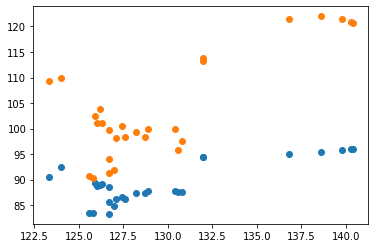

In [ ]:
plt.scatter(df_feature_developed_test_precovid['Land Freight Index'], df_target_developed_test_precovid)
plt.scatter(df_feature_developed_test_precovid['Land Freight Index'],pred)

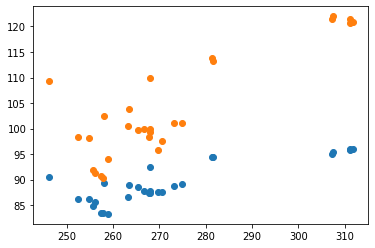

In [ ]:
plt.scatter(df_feature_developed_test_precovid['Sea Freight Index'], df_target_developed_test_precovid)
plt.scatter(df_feature_developed_test_precovid['Sea Freight Index'],pred)

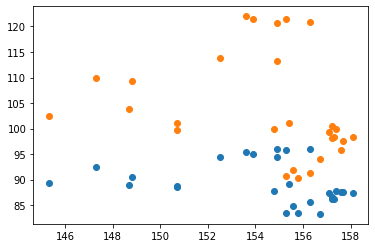

In [ ]:
plt.scatter(df_feature_developed_test_precovid['Air Freight Index'], df_target_developed_test_precovid)
plt.scatter(df_feature_developed_test_precovid['Air Freight Index'],pred)

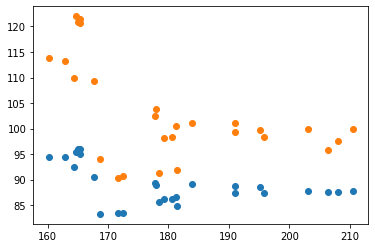

In [ ]:
plt.scatter(df_feature_developed_test_precovid['Staple Food Index'], df_target_developed_test_precovid)
plt.scatter(df_feature_developed_test_precovid['Staple Food Index'],pred)

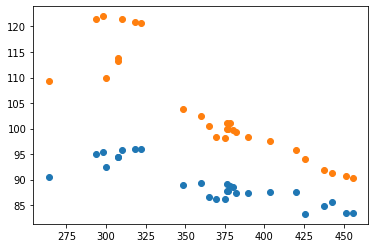

In [ ]:
plt.scatter(df_feature_developed_test_precovid['Fertilizer Index'], df_target_developed_test_precovid)
plt.scatter(df_feature_developed_test_precovid['Fertilizer Index'],pred)

In [ ]:
#r2 for CPI developed countries covid
target = prepare_target(df_target_developed_test_covid)

r2 = r2_score(target, pred_2)
print(r2)
print(beta_2)

[[0.6353795]]
[[108.65997456]
 [  1.56179063]
 [  1.65157629]
 [ -0.11448722]
 [  0.85551634]
 [  2.00314962]]


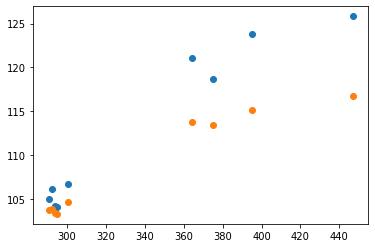

In [ ]:
plt.scatter(df_feature_developed_test_covid['Sea Freight Index'], df_target_developed_test_covid)
plt.scatter(df_feature_developed_test_covid['Sea Freight Index'],pred_2)

In [ ]:
#r2 for CPI developing countries precovid
target = prepare_target(df_target_developing_test_precovid)
r2 = r2_score(target, pred_3)
print(r2)
print(beta_3)

[[0.77394538]]
[[103.82681084]
 [  1.05468891]
 [  1.55951482]
 [ -0.75743523]
 [ -0.81745824]
 [ -5.54522484]
 [  1.1270776 ]
 [  1.88129116]]


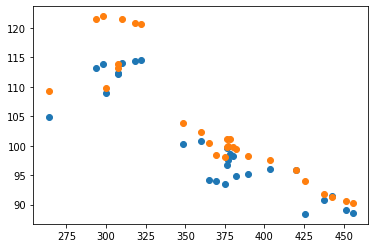

In [ ]:
plt.scatter(df_feature_developing_test_precovid['Fertilizer Index'], df_target_developing_test_precovid)
plt.scatter(df_feature_developing_test_precovid['Fertilizer Index'],pred_3)

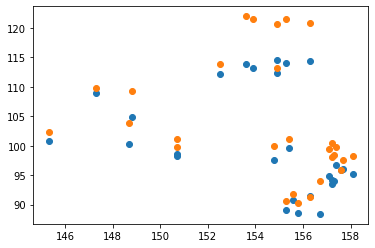

In [ ]:
plt.scatter(df_feature_developing_test_precovid['Air Freight Index'], df_target_developing_test_precovid)
plt.scatter(df_feature_developing_test_precovid['Air Freight Index'],pred_3)

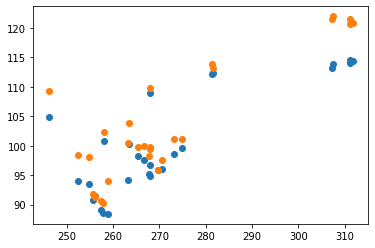

In [ ]:
plt.scatter(df_feature_developing_test_precovid['Sea Freight Index'], df_target_developing_test_precovid)
plt.scatter(df_feature_developing_test_precovid['Sea Freight Index'],pred_3)

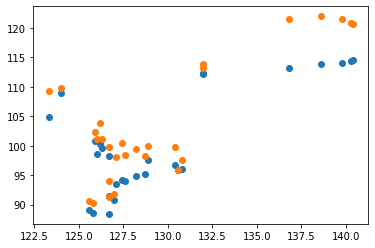

In [ ]:
plt.scatter(df_feature_developing_test_precovid['Land Freight Index'], df_target_developing_test_precovid)
plt.scatter(df_feature_developing_test_precovid['Land Freight Index'],pred_3)

In [ ]:
#r2 for CPI developing countries precovid
target = prepare_target(df_target_developing_test_covid)
r2 = r2_score(target, pred_4)
print(r2)
print(beta_4)

[[0.73221577]]
[[ 1.30627424e+02]
 [ 3.18867470e+00]
 [ 6.51761506e-01]
 [-1.26464281e-01]
 [ 1.49218464e+00]
 [ 1.80006827e+00]]


### Improving the Model

Polynomial transformation was used to improve the accuracy of the 4 models. Scatter plots were used to illustrate the spread of data for each feature. For graphs that were left-skewed, the values were squared to achieve a better spread. Likewise, for right-skewed graphs, the values were square-rooted to improve spread. Polynomial transformation resulted in a 0.4% improvement of accuracy, which highlights its success.

In [ ]:
#Attempt at transformation model 1
df_features_developed_precovid, df_target_developed_precovid = get_features_targets(df_target_features_table_developed_precovid, ['Land Freight Index', 'Sea Freight Index', 'Air Freight Index', 'Staple Food Index', 'Fertilizer Index'], ['CPI'])
df_features_developed_precovid_transformed = transform_features_leftskew(df_features_developed_precovid, 'Land Freight Index', 'Land_freight_index^2')
df_features_developed_precovid_transformed = transform_features_leftskew(df_features_developed_precovid, 'Sea Freight Index', 'Sea freight_index^2')
df_features_developed_precovid_transformed = transform_features_rightskew(df_features_developed_precovid, 'Air Freight Index', 'Air_freight_index^0.5')

display(df_features_developed_precovid_transformed)

df_feature_developed_train_precovid, df_feature_developed_test_precovid, df_target_developed_train_precovid, df_target_developed_test_precovid = split_data(df_features_developed_precovid_transformed, df_target_developed_precovid, random_state = 100, test_size = 0.3)

# normalize the feature using z normalization
df_feature_train_z = normalize_z(df_feature_developed_train_precovid)

X = prepare_feature(df_feature_train_z)
target = prepare_target(df_target_developed_train_precovid)
display(df_feature_train_z)


iterations = 1500
alpha = 0.01
beta = np.zeros((9,1))

# call the gradient_descent function
beta_1, J_storage = gradient_descent(X, target, beta, alpha, iterations)

# call the predict method to get the predicted values
pred_1 = predict(df_feature_developed_test_precovid, beta_1)

,Land Freight Index,Sea Freight Index,Air Freight Index,Staple Food Index,Fertilizer Index,Land_freight_index^2,Sea freight_index^2,Air_freight_index^0.5
0,124.0,244.7,155.3,170.533333,430.6,15376.00,59878.09,12.461942
1,124.6,248.0,155.8,167.366667,410.4,15525.16,61504.00,12.481987
2,126.2,257.2,156.2,168.933333,405.8,15926.44,66151.84,12.498000
3,126.7,258.9,156.7,168.666667,425.7,16052.89,67029.21,12.517987
4,127.0,259.0,156.3,169.200000,451.5,16129.00,67081.00,12.502000
...,...,...,...,...,...,...,...,...
91,136.1,310.8,154.4,173.400000,300.4,18523.21,96596.64,12.425780
92,136.6,311.6,153.8,173.933333,297.3,18659.56,97094.56,12.401613
93,136.6,309.4,154.3,173.533333,299.0,18659.56,95728.36,12.421755
94,140.1,323.7,156.2,175.833333,294.5,19628.01,104781.69,12.498000


,Land Freight Index,Sea Freight Index,Air Freight Index,Staple Food Index,Fertilizer Index,Land_freight_index^2,Sea freight_index^2,Air_freight_index^0.5
0,-0.929399,-1.071516,0.617382,-0.303779,1.450092,-0.914862,-1.020999,0.619185
1,-0.813260,-0.937993,0.802488,-0.567721,1.115996,-0.804823,-0.904616,0.802888
2,-0.503555,-0.565747,0.950573,-0.437139,1.039915,-0.508790,-0.571920,0.949637
4,-0.348703,-0.492917,0.987594,-0.414913,1.795766,-0.359357,-0.505410,0.986295
7,-0.387416,-0.521240,0.617382,0.237998,1.499710,-0.396803,-0.531330,0.619185
...,...,...,...,...,...,...,...,...
91,1.412744,1.602990,0.284192,-0.064842,-0.703338,1.406906,1.607339,0.287775
92,1.509527,1.635360,0.062065,-0.020388,-0.754610,1.507495,1.642981,0.066298
93,1.509527,1.546344,0.247171,-0.053728,-0.726493,1.507495,1.545187,0.250892
94,2.187007,2.124944,0.950573,0.137977,-0.800921,2.221942,2.193230,0.949637


In [ ]:
target = prepare_target(df_target_developed_test_precovid)
r2 = r2_score(target, pred_1)
print(r2)
print(beta_1)

[[0.71136505]]
[[90.83527867]
 [ 0.59654341]
 [ 0.87011166]
 [-0.11168784]
 [-0.34919556]
 [-2.30816287]
 [ 0.666019  ]
 [ 1.14137804]
 [-0.09263158]]


In [ ]:
#Attempt at transformation for model 3
df_features_developing_precovid, df_target_developing_precovid = get_features_targets(df_target_features_table_developing_precovid, ['Land Freight Index', 'Sea Freight Index', 'Air Freight Index', 'Staple Food Index', 'Fertilizer Index'], ['CPI'])
df_features_developing_precovid_transformed = transform_features_leftskew(df_features_developing_precovid, 'Land Freight Index', 'Land_freight_index^2')
df_features_developing_precovid_transformed = transform_features_leftskew(df_features_developing_precovid, 'Sea Freight Index', 'Sea freight_index^2')

display(df_features_developing_precovid_transformed)

df_feature_developing_train_precovid, df_feature_developing_test_precovid, df_target_developing_train_precovid, df_target_developing_test_precovid = split_data(df_features_developing_precovid_transformed, df_target_developing_precovid, random_state = 100, test_size = 0.3)

# normalize the feature using z normalization
df_feature_train_z = normalize_z(df_feature_developing_train_precovid)

X = prepare_feature(df_feature_train_z)
target = prepare_target(df_target_developing_train_precovid)
display(df_feature_train_z)


iterations = 1500
alpha = 0.01
beta = np.zeros((8,1))

# call the gradient_descent function
beta_3, J_storage = gradient_descent(X, target, beta, alpha, iterations)

# call the predict method to get the predicted values
pred_3 = predict(df_feature_developing_test_precovid, beta_3)

,Land Freight Index,Sea Freight Index,Air Freight Index,Staple Food Index,Fertilizer Index,Land_freight_index^2,Sea freight_index^2
0,124.0,244.7,155.3,170.533333,430.6,15376.00,59878.09
1,124.6,248.0,155.8,167.366667,410.4,15525.16,61504.00
2,126.2,257.2,156.2,168.933333,405.8,15926.44,66151.84
3,126.7,258.9,156.7,168.666667,425.7,16052.89,67029.21
4,127.0,259.0,156.3,169.200000,451.5,16129.00,67081.00
...,...,...,...,...,...,...,...
91,136.1,310.8,154.4,173.400000,300.4,18523.21,96596.64
92,136.6,311.6,153.8,173.933333,297.3,18659.56,97094.56
93,136.6,309.4,154.3,173.533333,299.0,18659.56,95728.36
94,140.1,323.7,156.2,175.833333,294.5,19628.01,104781.69


,Land Freight Index,Sea Freight Index,Air Freight Index,Staple Food Index,Fertilizer Index,Land_freight_index^2,Sea freight_index^2
0,-0.929399,-1.071516,0.617382,-0.303779,1.450092,-0.914862,-1.020999
1,-0.813260,-0.937993,0.802488,-0.567721,1.115996,-0.804823,-0.904616
2,-0.503555,-0.565747,0.950573,-0.437139,1.039915,-0.508790,-0.571920
4,-0.348703,-0.492917,0.987594,-0.414913,1.795766,-0.359357,-0.505410
7,-0.387416,-0.521240,0.617382,0.237998,1.499710,-0.396803,-0.531330
...,...,...,...,...,...,...,...
91,1.412744,1.602990,0.284192,-0.064842,-0.703338,1.406906,1.607339
92,1.509527,1.635360,0.062065,-0.020388,-0.754610,1.507495,1.642981
93,1.509527,1.546344,0.247171,-0.053728,-0.726493,1.507495,1.545187
94,2.187007,2.124944,0.950573,0.137977,-0.800921,2.221942,2.193230


In [ ]:
target = prepare_target(df_target_developing_test_precovid)
r2 = r2_score(target, pred_3)
print(r2)
print(beta_3)

[[0.77394538]]
[[103.82681084]
 [  1.05468891]
 [  1.55951482]
 [ -0.75743523]
 [ -0.81745824]
 [ -5.54522484]
 [  1.1270776 ]
 [  1.88129116]]


### Discussion and Analysis

After calculating the R-squared values of the 4 models, it can be seen that the 2 models during the pre-Covid period has higher accuracy with R-squared values above 0.7. In contrast, the other 2 models during the Covid period has lower accuracy due to the smaller size of data. This is unfortunate but unavoidable as we only have data till 2022 which is the present. Our models for the Covid era will improve if we can continue collecting data until maybe 5 years into the future. 